<a href="https://colab.research.google.com/github/Pimchanok6430205105/BSC_DPDM23/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preparation

In [2]:
import pandas as pd
import numpy as np

In [51]:
buy_computer = pd.read_excel('/content/drive/MyDrive/BSC_DPDM23/who-buys-computer-data.xlsx', header = 0) # (1) Set header = None because there is no column names in the data file

print(buy_computer.shape)
buy_computer.head()

(14, 5)


,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


In [68]:
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

In [48]:
np.random.seed(seed=1)

In [52]:
a = np.random.randint(2, size=len(buy_computer))

In [53]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [70]:
train = df[a == 1]
train.shape

(9, 5)

In [66]:
test = df[a == 0]
test.shape

(5, 5)

In [71]:
train

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
11,31…40,medium,no,excellent,yes
13,>40,medium,no,excellent,no


In [72]:
test

,age,income,student,credit_rating,buys_computer
2,3140,high,no,fair,yes
3,40,medium,no,fair,yes
9,40,medium,yes,fair,yes
10,30,medium,yes,excellent,yes
12,3140,high,yes,fair,yes


In [73]:
X_train = train.iloc[:,:-1]

In [74]:
y_train = train.iloc[:,-1]

### import

In [60]:
from sklearn.tree import DecisionTreeClassifier

### define

In [75]:
Dtree_COM = DecisionTreeClassifier(random_state=0)

In [76]:
Dtree_COM

DecisionTreeClassifier(random_state=0)

In [83]:
from sklearn import tree

In [85]:
tree.plot(Dtree_COM);

AttributeError: module 'sklearn.tree' has no attribute 'plot'

##Dtree1

In [77]:
Dtree_COM.fit(X_train,y_train)

ValueError: could not convert string to float: '<=30'

### test

In [78]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [79]:
y_test

2     yes
3     yes
9     yes
10    yes
12    yes
Name: buys_computer, dtype: object

In [80]:
y_predict = Dtree_COM.predict(X_test)

ValueError: could not convert string to float: 'high'

In [81]:
y_predict

NameError: name 'y_predict' is not defined

In [ ]:
from sklearn import tree

In [ ]:
tree.plot_tree(Dtree_COM);

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_predict = Dtree1.predict(X_test)

In [ ]:
y_predict

In [ ]:
accuracy_score(y_test, y_predict)

In [ ]:
df

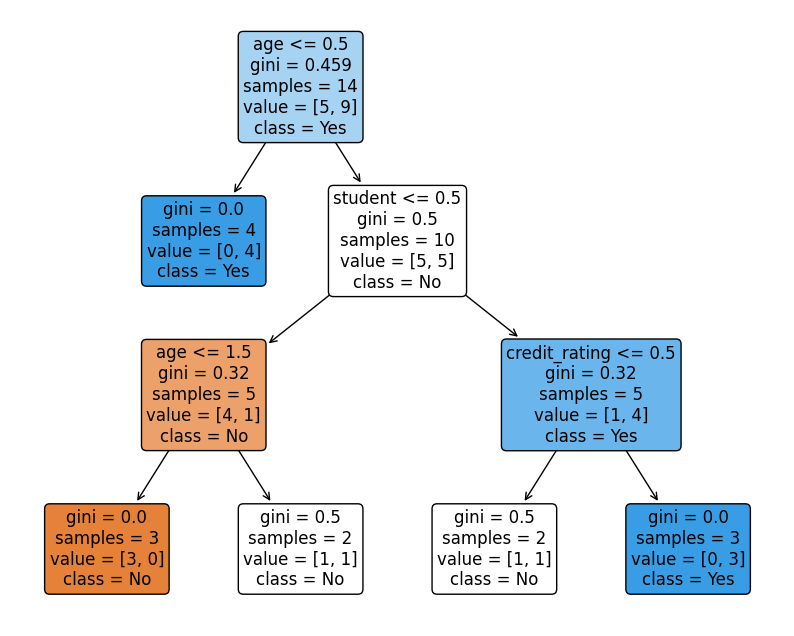

Accuracy Score: 1.0


In [87]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Define the dataset
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
label_encoder = LabelEncoder()
encoded_df = df.apply(label_encoder.fit_transform)

# Separate features and target variable
X = encoded_df.drop('buys_computer', axis=1)
y = encoded_df['buys_computer']

# Initialize and train the decision tree with a specified min_weight_fraction_leaf
dtree = DecisionTreeClassifier(min_weight_fraction_leaf=0.1, random_state=0)
dtree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, fontsize=12)
plt.show()
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Making predictions
y_pred = dtree.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')


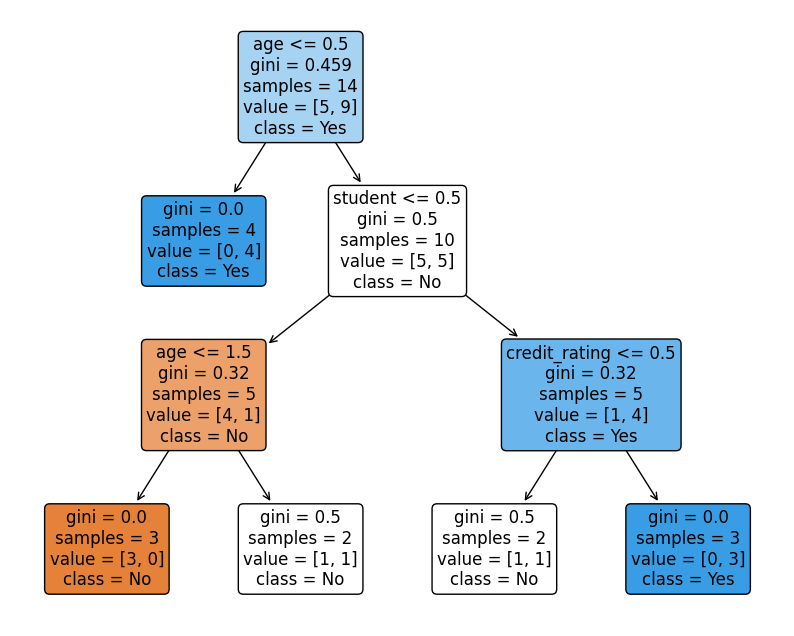

NameError: name 'train_test_split' is not defined

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Define the dataset
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
label_encoder = LabelEncoder()
encoded_df = df.apply(label_encoder.fit_transform)

# Separate features and target variable
X = encoded_df.drop('buys_computer', axis=1)
y = encoded_df['buys_computer']

# Initialize and train the decision tree with a specified min_weight_fraction_leaf
dtree = DecisionTreeClassifier(min_weight_fraction_leaf=0.14, random_state=0)
dtree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, fontsize=12)
plt.show()
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Making predictions
y_pred = dtree.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')


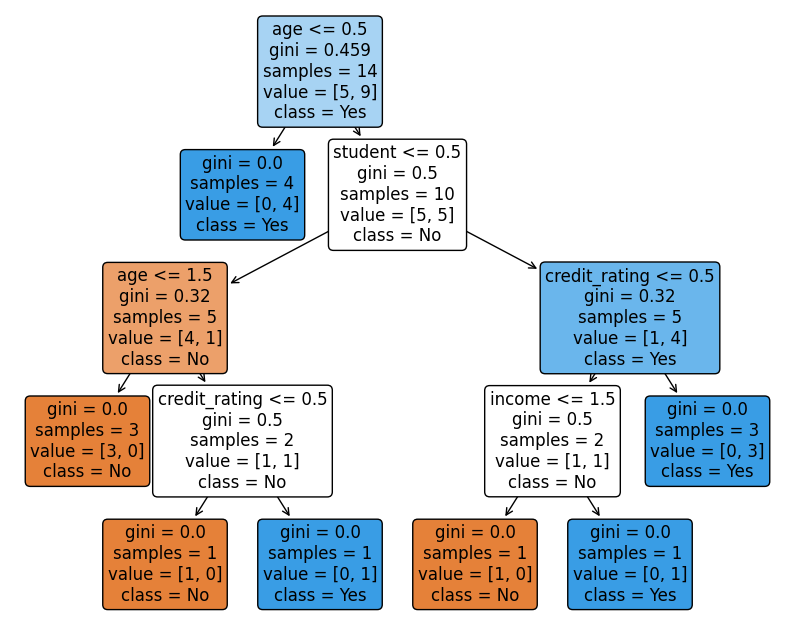

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Define the dataset
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Encode categorical variables
label_encoder = LabelEncoder()
encoded_df = df.apply(label_encoder.fit_transform)

# Separate features and target variable
X = encoded_df.drop('buys_computer', axis=1)
y = encoded_df['buys_computer']

# Initialize and train the decision tree
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, fontsize=12)
plt.show()
